## Visualisation

This notebooks shows how to visualise the predictions of the semantic segmentation

### Requirements:

+ Pre-trained weights of the models
+ opencv-python

In [1]:
# library import
import imutils
import  PIL 
from PIL import Image
import cv2
import numpy

from fastai.vision.all import *
import pathlib

### Solução exercício  número 1

In [2]:
# access test images
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath
path =  Path('img_rgb_segmentation')

In [5]:
# function that associates images with labels
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [6]:
def IoU(preds:Tensor, targs:Tensor, eps:float=1e-8):
    '''
    Function that defines the intersection between the predicted mask and the target
    Args:
    ---------
        preds: predicted tensor
        targs: target tensor
    Return:
    ---------
        iou: intersection
    '''
    num_classes = preds.shape[1]
    true_1_hot = torch.eye(num_classes)[targs.squeeze(1)]
    true_1_hot = true_1_hot.permute(0, 3, 1, 2).float()
    probas = F.softmax(preds, dim=1)
    true_1_hot = true_1_hot.type(preds.type())
    dims = (0,) + tuple(range(2, targs.ndimension()))
    intersection = torch.sum(probas * true_1_hot, dims) 
    cardinality = torch.sum(probas + true_1_hot, dims)  
    union = cardinality - intersection
    iou = (intersection / (union + eps)).mean()  
    return iou

In [7]:
# Load segmentation weights
learn=load_learner(path/'segmentation.pkl')

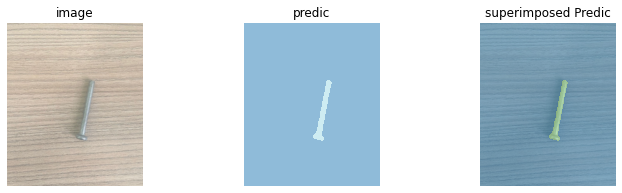

In [33]:
# Read test image
img_color_pilformat = PILImage.create(path/"Parafuso 3.png")

# Inference on test images
prediction = learn.predict(img_color_pilformat)

# Visualisation of the object detection in test image
_,axs = plt.subplots(1,3, figsize=(12,3))
img_color_pilformat.show(ctx=axs[0], title='image')
prediction[0].show(ctx=axs[1],  vmin=0, vmax=1,title='predic')
img_color_pilformat.show(ctx=axs[2], title='superimposed Predic')
prediction[0].show(ctx=axs[2], vmin=0, vmax=4);
plt.show()

### Solução exercício  número 2

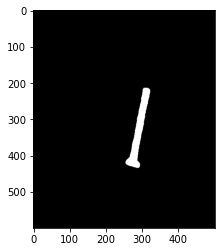

In [31]:
# Binarization of the predicted image using the opencv library
binary_img=cv2.inRange(np.float32(prediction[0]),1,2)
plt.imshow(binary_img,'gray')

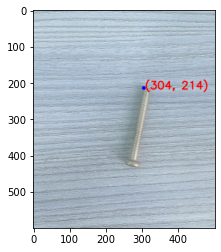

In [32]:
# Post-processing and calculation of contours of the mask
img_color_opencvformat = cv2.cvtColor(numpy.array(img_color_pilformat), cv2.COLOR_RGB2BGR)
cnts = cv2.findContours(binary_img.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# list the tuples that save the maximum and minimum values of the contour
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# Text coordinate in image
org = (extTop[0]+3,extTop[1]+3)
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
# Color of text
color = (255, 0, 0)
thickness = 2

# Visualization of the highest point of the contour
img_point_coordinates = cv2.circle(img_color_opencvformat, extTop, radius=5, color=(0, 0, 255), thickness=-1)
img_point_coordinates = cv2.putText(img_color_opencvformat, str(extTop), org, font,fontScale, color, thickness, cv2.LINE_AA)
plt.imshow(img_point_coordinates,'gray')